# Business Insights using Pandas, Matplotlib, and Seaborn
## **Objective**
In this notebook, we will explore and visualize a business dataset using **Pandas, Matplotlib, and Seaborn**.
We will answer **business questions** by creating various chart types.

## **Dataset**
- **Superstore Sales Dataset**: Contains information on sales, profit, category, region, and discount.
- **Columns Example:** `Order Date`, `Category`, `Region`, `Sales`, `Profit`, `Discount`.

## **Libraries Used**
- **Pandas:** Data manipulation and analysis.
- **Matplotlib:** Basic and customizable plotting.
- **Seaborn:** High-level data visualization with advanced aesthetics.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')

# Load dataset (replace with your CSV path)
df = pd.read_csv('superstore_sales.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,B2b,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### **Explanation**
- We import **Pandas, Matplotlib, Seaborn**.
- `%matplotlib inline` ensures that all plots appear inside the Jupyter notebook.
- We load the dataset and preview the first few rows using `df.head()`.

In [3]:
# Check dataset info
df.info()

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Check for missing values
print('Missing values:\n', df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

ValueError: time data "15-04-2017" doesn't match format "%m-%d-%Y", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

### **Explanation**
- We check the data types using `df.info()`.
- We convert `Order Date` to datetime format for time-based analysis.
- We check for missing values to ensure data quality.

## **Case Study 1: Sales Distribution**

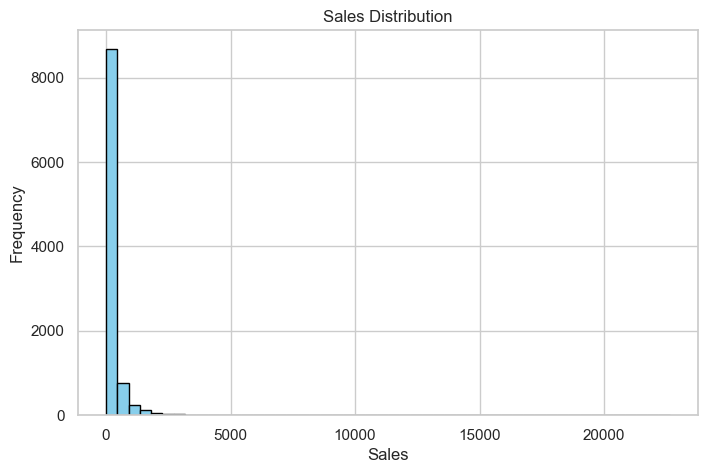

In [4]:
plt.figure(figsize=(8,5))
plt.hist(df['Sales'], bins=50, color='skyblue', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

### **Insight**
- Histogram shows how sales are distributed.
- Most orders are of lower sales value, while few orders have very high sales.

## **Case Study 2: Sales by Category**

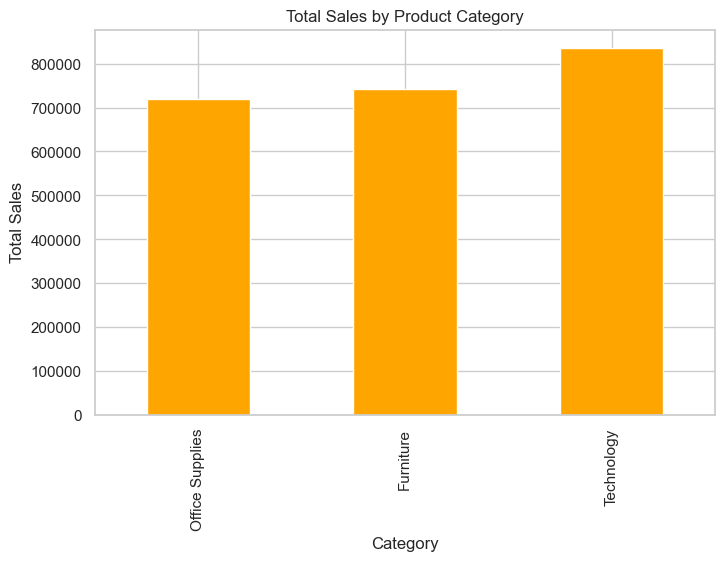

In [5]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values()

plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

### **Insight**
- Technology and Office Supplies categories generate the highest sales.

## **Case Study 3: Monthly Sales Trend**

In [6]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

## **Case Study 4: Sales vs Profit (Scatter Plot)**

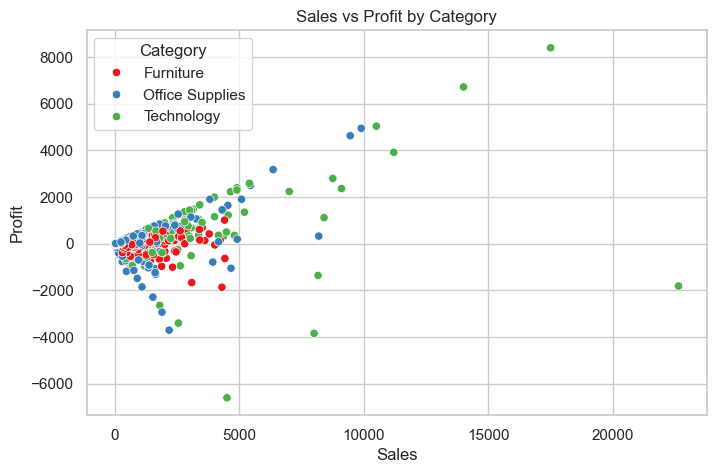

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category', palette='Set1')
plt.title('Sales vs Profit by Category')
plt.show()

## **Case Study 5: Region-Wise Sales (Pie Chart)**

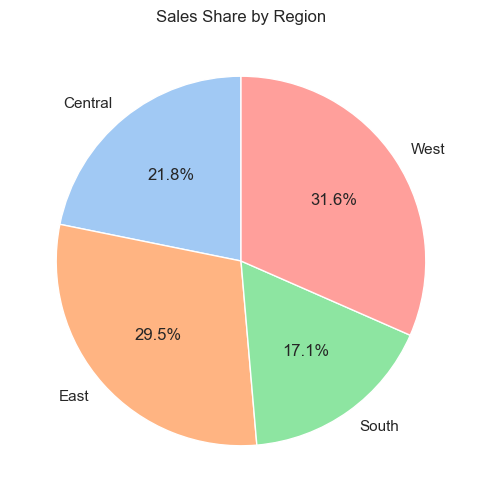

In [8]:
region_sales = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(6,6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Sales Share by Region')
plt.show()

## **Case Study 6: Correlation Heatmap**

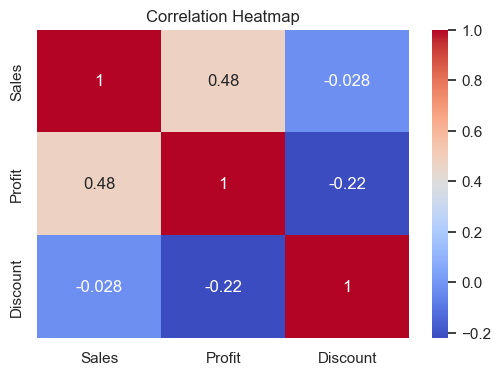

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales','Profit','Discount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Insight**
- Profit is negatively correlated with Discount.
- Higher discounts reduce profitability.

## **Summary of Insights**
1. Most orders are small in sales value, but a few high-value orders exist.
2. Technology category generates the highest sales.
3. Discounts are reducing profit margins significantly.
4. The Western region has the largest share of sales.
5. Monthly trends show seasonality, with peaks during holiday seasons.

## **Next Steps**
- Convert this analysis into a **dashboard** using **Streamlit or Flask**.
- Add more charts such as **violin plots, pair plots, and treemaps** for deeper insights.